In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Things to have memorized:

N = number of samples

T = sequence length

D = # of input features (e.g. # of electrodes measuring brain activity, as in NeuraLink)

M = # of hidden units (a hyperparameter)

K = # of output units

In [2]:
N = 1
T = 10
D = 3
K = 2
X = np.random.randn(N, T, D)

In [3]:
# Make an RNN
M = 5
i = Input(shape=(T, D))
x = SimpleRNN(M)(i) # default tanh activation
x = Dense(K)(x) # regression with 2 output nodes, no activation function

model = Model(i, x)

In [4]:
Yhat = model.predict(X) # random prediction
print(Yhat)

[[-1.346278   -0.49631682]]


In [5]:
# See the layers of the model, to see if we can replace this output
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 3)]           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 5)                 45        
                                                                 
 dense (Dense)               (None, 2)                 12        
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


For RNN, our first step involves calculating h_1 (simple recurrent unit aka elman unit) using x_1 and the initial hidden state h_0 (which can be learned, but in TensorFlow its not learnable and is all 0's). Second step (2nd screenshot) uses the ouput from step 1 and x_2. And so forth

x = input

h = hidden

o = output

xh = input-to-hidden

hh = hidden-to-hidden

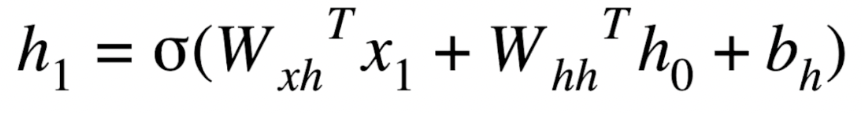

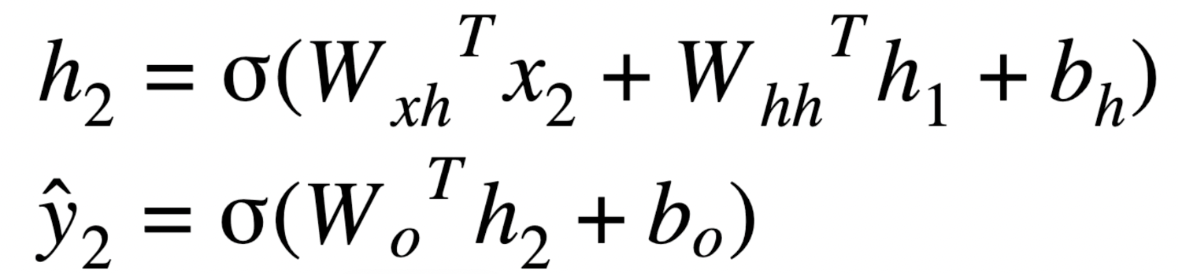

In [6]:
# See whats returned
model.layers[1].get_weights()

[array([[ 0.2770533 ,  0.697045  , -0.8460878 ,  0.6155334 , -0.09029716],
        [-0.78742826, -0.00155479, -0.31691962, -0.81243914,  0.25372392],
        [ 0.56308585,  0.21298856, -0.06892455,  0.46552736, -0.6761925 ]],
       dtype=float32),
 array([[-0.09498417,  0.23341279, -0.09315825, -0.6434313 , -0.7168083 ],
        [-0.11397066,  0.5610529 ,  0.5034959 , -0.41013458,  0.50051177],
        [ 0.24924918,  0.4942002 , -0.78870684, -0.03831396,  0.26479167],
        [ 0.84503776,  0.25704125,  0.33127823,  0.20828222, -0.25829095],
        [ 0.4491934 , -0.566069  , -0.07752319, -0.6106851 ,  0.3143962 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32)]

In [7]:
# More helpful to see the shapes of these arrays
a, b, c = model.layers[1].get_weights()
print(a.shape, b.shape, c.shape)

(3, 5) (5, 5) (5,)


# Calculating our savings (shared weights, like CNN does) / number of parameters:

T = 10

D = 3

M = 5

W_xh goes D x M (input to hidden) = 3 x 5 = 15

W_hh goes M x M (hidden to hidden) = 5 x 5 = 25

b_h (bias term) is a vector of length M = 5

total = 15 + 25 + 5 = 45


In [8]:
Wx, Wh, bh = model.layers[1].get_weights()
# Output layer is W_o and b_o
Wo, bo = model.layers[2].get_weights()

In [9]:
# Pseudo-code from the lecture "Recurrent Neural Networks"
# Should give us same output as a call to predict()
h_last = np.zeros(M) # initial hidden state
x = X[0]
Yhat = [] # store the output

for t in range(T):
  h = np.tanh(x[t].dot(Wx) + h_last.dot(Wh) + bh)
  y = h.dot(Wo) + bo
  Yhat = y

  h_last = h

print(Yhat)

[-1.3462779  -0.49631678]
